In [165]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')


In [166]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [167]:
df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
df['survived'].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

In [169]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [170]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\554000348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\554000348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [172]:
df.drop(columns='deck', inplace=True)


In [173]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [174]:
print(df.select_dtypes(include=['object', 'category']).columns)

Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')


In [175]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()

le = LabelEncoder()
df_label['sex'] = le.fit_transform(df_label['sex'])  
df_label['who'] = le.fit_transform(df_label['who'])
df_label['class'] = le.fit_transform(df_label['class'])  


In [176]:
df_ohe = pd.get_dummies(df, columns=['embarked', 'embark_town'], drop_first=True)

In [177]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

print(num_cols)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


In [178]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

df_standardized = df.copy()
df_standardized[num_cols] = scaler_std.fit_transform(df[num_cols])

print(df_standardized[num_cols].head())


   survived    pclass       age     sibsp     parch      fare
0 -0.789272  0.827377 -0.565736  0.432793 -0.473674 -0.502445
1  1.266990 -1.566107  0.663861  0.432793 -0.473674  0.786845
2  1.266990  0.827377 -0.258337 -0.474545 -0.473674 -0.488854
3  1.266990 -1.566107  0.433312  0.432793 -0.473674  0.420730
4 -0.789272  0.827377  0.433312 -0.474545 -0.473674 -0.486337


In [179]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

df_normalized = df.copy()
df_normalized[num_cols] = scaler_mm.fit_transform(df[num_cols])

print(df_normalized[num_cols].head())


   survived  pclass       age  sibsp  parch      fare
0       0.0     1.0  0.271174  0.125    0.0  0.014151
1       1.0     0.0  0.472229  0.125    0.0  0.139136
2       1.0     1.0  0.321438  0.000    0.0  0.015469
3       1.0     0.0  0.434531  0.125    0.0  0.103644
4       0.0     1.0  0.434531  0.000    0.0  0.015713


C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\3539022957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='survived', palette='Set2')


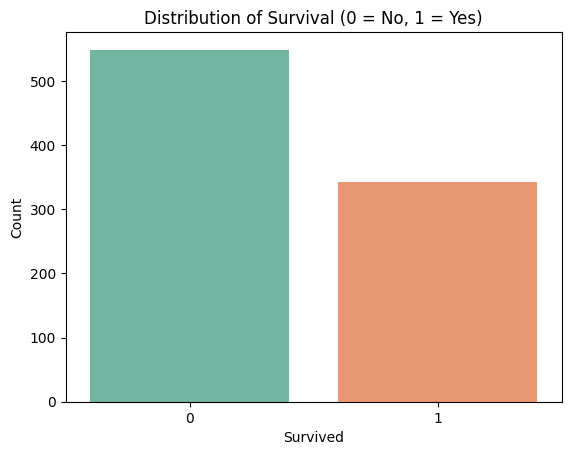

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='survived', palette='Set2')
plt.title("Distribution of Survival (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()


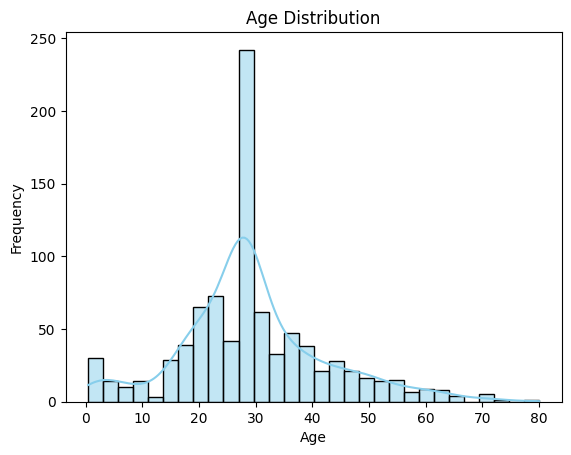

In [181]:
sns.histplot(data=df, x='age', kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


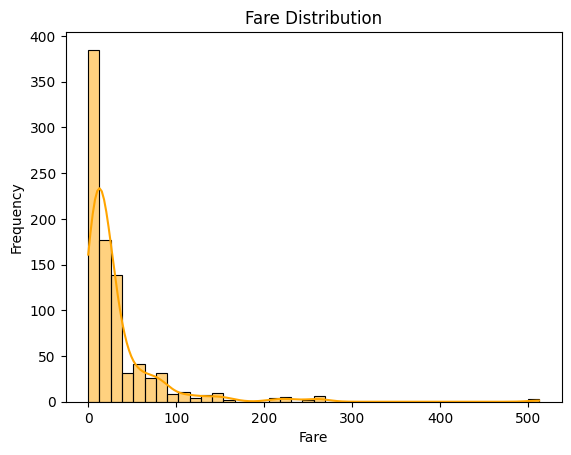

In [182]:
sns.histplot(data=df, x='fare', kde=True, bins=40, color='orange')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


In [184]:
features = ['pclass', 'sex', 'age', 'fare', 'embarked']

df_encoded = pd.get_dummies(df[features], drop_first=True)

target = df['survived']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)


In [186]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [187]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.7989


In [188]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)


      Feature  Coefficient
3    sex_male    -2.459285
0      pclass    -1.005942
5  embarked_S    -0.513979
4  embarked_Q    -0.100021
1         age    -0.024610
2        fare     0.000362


In [189]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

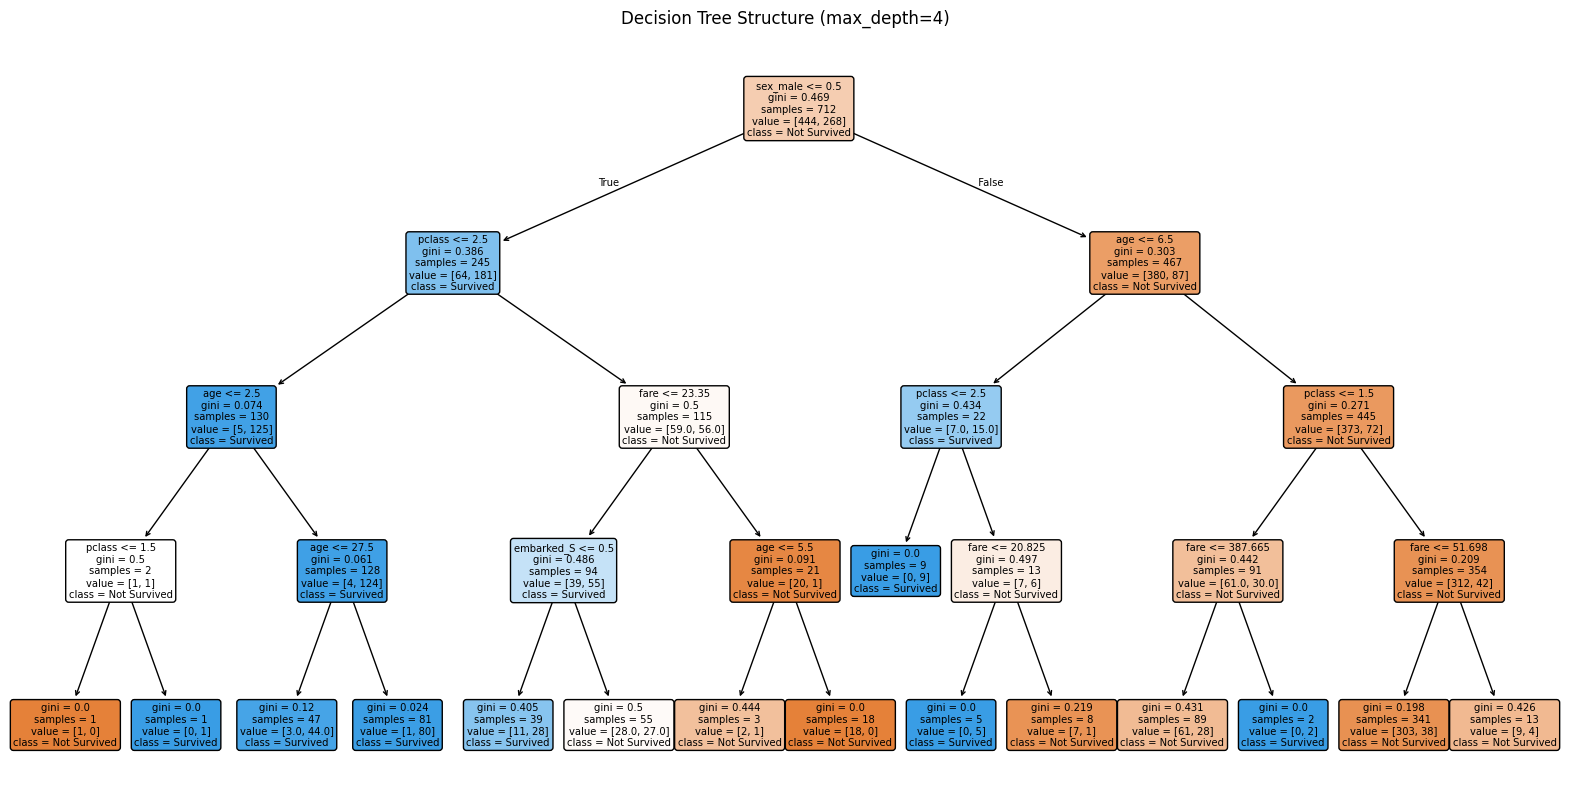

In [190]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(dt_model,
          feature_names=X_train.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Structure (max_depth=4)")
plt.show()


In [191]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")


Decision Tree Accuracy: 0.7989


In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [193]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc:.4f}")


KNN Accuracy: 0.7039


In [194]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")


SVM Accuracy: 0.6536


In [195]:
print(f"KNN Accuracy : {knn_acc:.4f}")
print(f"SVM Accuracy : {svm_acc:.4f}")


KNN Accuracy : 0.7039
SVM Accuracy : 0.6536


In [196]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.7989



Feature Importances:
      Feature  Importance
2        fare    0.311778
1         age    0.281422
3    sex_male    0.280286
0      pclass    0.094611
5  embarked_S    0.023113
4  embarked_Q    0.008791


C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\4010863276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


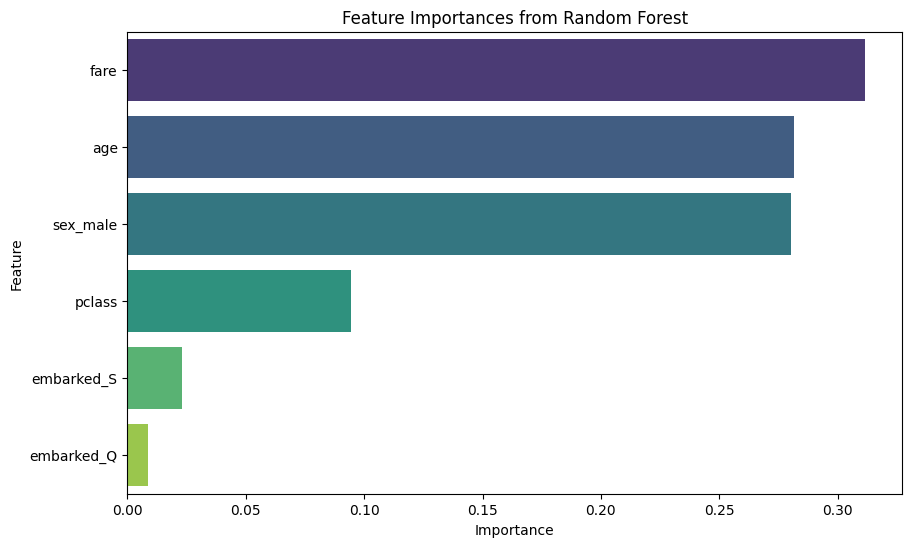

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feat_imp_df)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [198]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix - Random Forest")
# plt.show()

cm

array([[86, 19],
       [17, 57]], dtype=int64)

In [200]:
print(classification_report(y_test, y_pred_rf, target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.83      0.82      0.83       105
    Survived       0.75      0.77      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [201]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
R² Score: 0.5758


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [204]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_raw = lr.predict(X_test)
r2_raw = r2_score(y_test, y_pred_raw)

print(f"R² without scaling: {r2_raw:.4f}")


R² without scaling: 0.5758


In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [206]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lr_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"R² with StandardScaler: {r2_scaled:.4f}")


R² with StandardScaler: 0.5758


In [207]:
print(f"Without Scaling R² : {r2_raw:.4f}")
print(f"With Scaling R²    : {r2_scaled:.4f}")


Without Scaling R² : 0.5758
With Scaling R²    : 0.5758


In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [209]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# model = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(f"Best CV Score: {grid_search.best_score_:.4f}")


In [210]:
# from sklearn.metrics import accuracy_score

# best_model = grid_search.best_estimator_

# y_pred_best = best_model.predict(X_test)
# test_acc = accuracy_score(y_test, y_pred_best)
# print(f"Test Accuracy with Best Parameters: {test_acc:.4f}")


In [211]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [213]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)


[0.25313826 0.23403182]


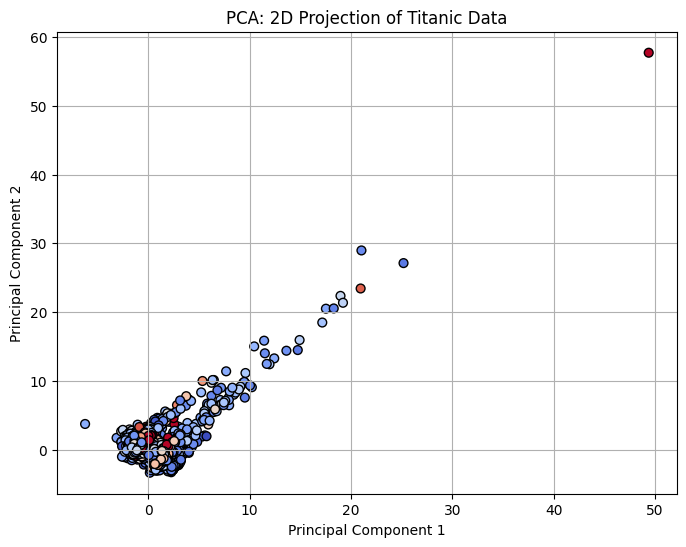

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Titanic Data')
plt.grid(True)
plt.show()


In [215]:
print(y_train[:10])
print(y_train.dtype)

[1.03    3.821   1.726   0.934   0.965   2.648   1.573   5.00001 1.398
 3.156  ]
float64


In [216]:
from sklearn.linear_model import LinearRegression

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE: {mean_squared_error(y_test, y_pred_pca):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_pca):.4f}")


MSE: 1.29
R² Score: 0.0121


In [217]:
import numpy as np

print(np.unique(y_train))
print(y_train.dtype)



[0.14999 0.225   0.25    ... 4.991   5.      5.00001]
float64


In [218]:
from sklearn.linear_model import LinearRegression

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score
print(f"MSE with PCA: {mean_squared_error(y_test, y_pred_pca):.2f}")
print(f"R² Score with PCA: {r2_score(y_test, y_pred_pca):.4f}")


MSE with PCA: 1.29
R² Score with PCA: 0.0121


In [219]:
from sklearn.linear_model import LinearRegression
import joblib

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, "linear_model.pkl")  


['linear_model.pkl']

In [220]:
loaded_model = joblib.load("linear_model.pkl")
y_pred = loaded_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


R² Score: 0.5758
MSE: 0.56


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression


In [222]:
num_features = ['age', 'fare', 'pclass']
cat_features = ['sex', 'embarked']

X = df[num_features + cat_features]
y = df['survived']


In [223]:
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])


In [224]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [225]:
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred_pipe = model_pipeline.predict(X_test)
print(f"Pipeline Accuracy: {accuracy_score(y_test, y_pred_pipe):.4f}")


Pipeline Accuracy: 0.7989


In [227]:
duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows}")


Total Duplicate Rows: 116


In [228]:
df = df.drop_duplicates()

print(f"Shape after removing duplicates: {df.shape}")


Shape after removing duplicates: (775, 14)


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(df[num_cols].isnull().sum())

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64


In [230]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

df[num_cols] = median_imputer.fit_transform(df[num_cols])

print(df[num_cols].isnull().sum())


survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64


In [231]:
import pandas as pd
import numpy as np

df['booking_date'] = pd.to_datetime(np.random.choice(pd.date_range(start='1900-01-01', end='1912-04-15'), size=len(df)))

df[['booking_date']].head()


,booking_date
0,1906-05-03
1,1903-12-29
2,1907-12-07
3,1911-11-03
4,1911-12-11


In [232]:
df['booking_year'] = df['booking_date'].dt.year
df['booking_month'] = df['booking_date'].dt.month
df['booking_day'] = df['booking_date'].dt.day

df[['booking_date', 'booking_year', 'booking_month', 'booking_day']].head()


,booking_date,booking_year,booking_month,booking_day
0,1906-05-03,1906,5,3
1,1903-12-29,1903,12,29
2,1907-12-07,1907,12,7
3,1911-11-03,1911,11,3
4,1911-12-11,1911,12,11


In [233]:
df.drop(columns='booking_date', inplace=True)


In [234]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'booking_year', 'booking_month', 'booking_day'],
      dtype='object')

In [235]:
df['safety_level'] = np.random.choice(['Low', 'Medium', 'High'], size=len(df))

df['safety_level'].value_counts()


safety_level
Low       269
High      260
Medium    246
Name: count, dtype: int64

In [236]:
from sklearn.preprocessing import OrdinalEncoder

safety_order = [['Low', 'Medium', 'High']]

ordinal_encoder = OrdinalEncoder(categories=safety_order)
df['safety_level_encoded'] = ordinal_encoder.fit_transform(df[['safety_level']])

df[['safety_level', 'safety_level_encoded']].head()


,safety_level,safety_level_encoded
0,Medium,1.0
1,High,2.0
2,High,2.0
3,Medium,1.0
4,Low,0.0


In [237]:
df.drop(columns='safety_level', inplace=True)


In [239]:
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,booking_year,booking_month,booking_day,safety_level_encoded
0,0.0,3.0,male,22.0,1.0,0.0,7.25,S,Third,man,True,Southampton,no,False,1906,5,3,1.0


In [250]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'booking_year', 'booking_month', 'booking_day',
       'safety_level_encoded'],
      dtype='object')

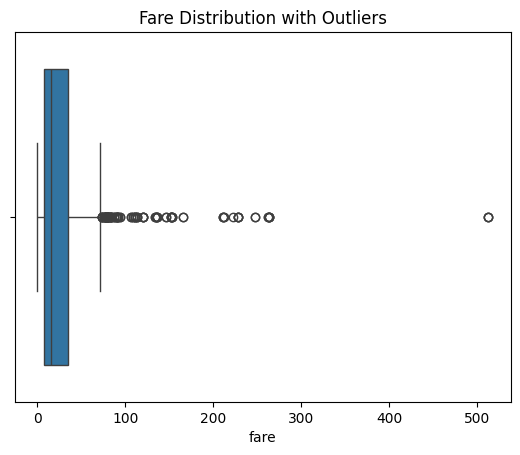

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare'])
plt.title("Fare Distribution with Outliers")
plt.show()


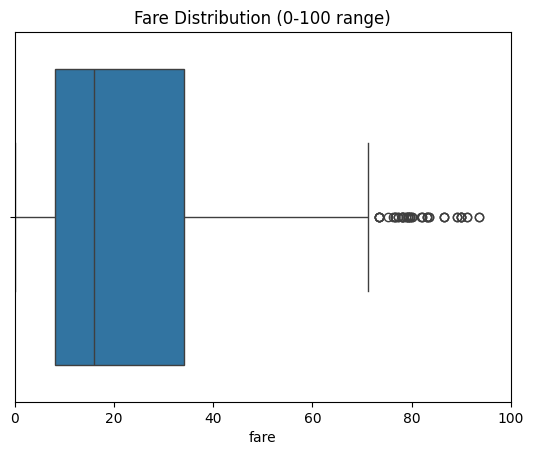

In [253]:
sns.boxplot(x=df['fare'])
plt.xlim(0, 100)  
plt.title("Fare Distribution (0-100 range)")
plt.show()

In [255]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['fare'] < lower_limit) | (df['fare'] > upper_limit)]
print(f"Number of outliers in 'fare': {len(outliers)}")


Number of outliers in 'fare': 102


In [256]:
df_cleaned = df[(df['fare'] >= lower_limit) & (df['fare'] <= upper_limit)]
print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape after removing outliers: (673, 18)


In [257]:
df_cleaned = df[(df['fare'] >= lower_limit) & (df['fare'] <= upper_limit)]
print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape after removing outliers: (673, 18)


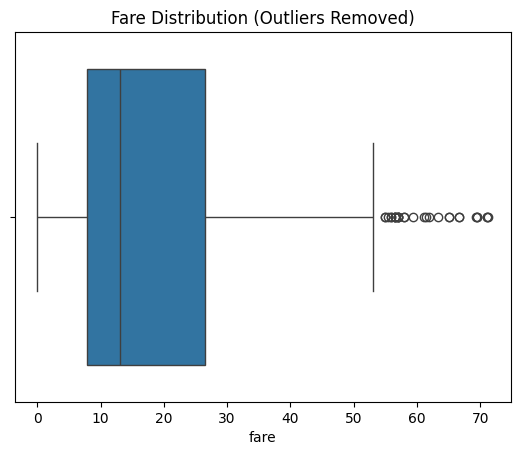

In [258]:
sns.boxplot(x=df_cleaned['fare'])
plt.title("Fare Distribution (Outliers Removed)")
plt.show()


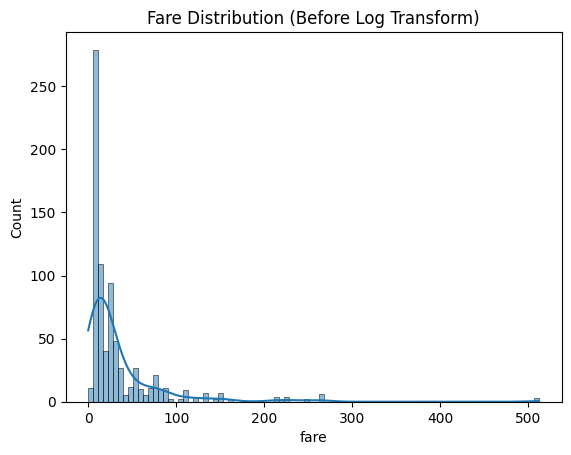

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution (Before Log Transform)")
plt.show()


In [ ]:
import numpy as np

df['fare_log'] = np.log1p(df['fare'])

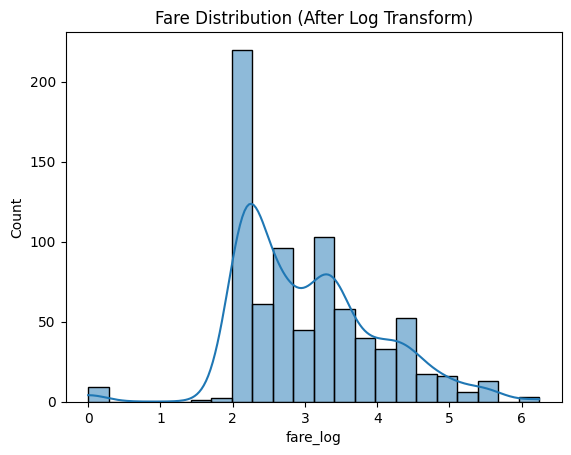

In [268]:
sns.histplot(df['fare_log'], kde=True)
plt.title("Fare Distribution (After Log Transform)")
plt.show()


In [ ]:
df.drop(columns='fare', inplace=True)

In [ ]:
df['survived_label'] = df['survived'].map({0: 'Died', 1: 'Survived'})

df['survived_label'].value_counts()


survived_label
Died        455
Survived    320
Name: count, dtype: int64

In [271]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['survived_encoded'] = label_encoder.fit_transform(df['survived_label'])

df[['survived_label', 'survived_encoded']].head()


,survived_label,survived_encoded
0,Died,0
1,Survived,1
2,Survived,1
3,Survived,1
4,Died,0


In [272]:
decoded_labels = label_encoder.inverse_transform(df['survived_encoded'])
print(decoded_labels[:5])


['Died' 'Survived' 'Survived' 'Survived' 'Died']


In [ ]:
from sklearn.model_selection import train_test_split

features = ['age', 'fare']
target = 'survived'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numeric pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


In [277]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [279]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression())
])


In [280]:
pipeline.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_test)
print(f"Pipeline Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Pipeline Accuracy: 0.7989


In [281]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [282]:
corr_matrix = numeric_df.corr()

print(corr_matrix)


                      survived    pclass       age     sibsp     parch  \
survived              1.000000 -0.331388 -0.078114 -0.037841  0.069864   
pclass               -0.331388  1.000000 -0.342745  0.087050  0.038998   
age                  -0.078114 -0.342745  1.000000 -0.279316 -0.182697   
sibsp                -0.037841  0.087050 -0.279316  1.000000  0.379535   
parch                 0.069864  0.038998 -0.182697  0.379535  1.000000   
safety_level_encoded  0.053030 -0.025236  0.030727  0.009093  0.016336   
fare_log              0.312292 -0.701375  0.107668  0.291093  0.303294   

                      safety_level_encoded  fare_log  
survived                          0.053030  0.312292  
pclass                           -0.025236 -0.701375  
age                               0.030727  0.107668  
sibsp                             0.009093  0.291093  
parch                             0.016336  0.303294  
safety_level_encoded              1.000000  0.024662  
fare_log              

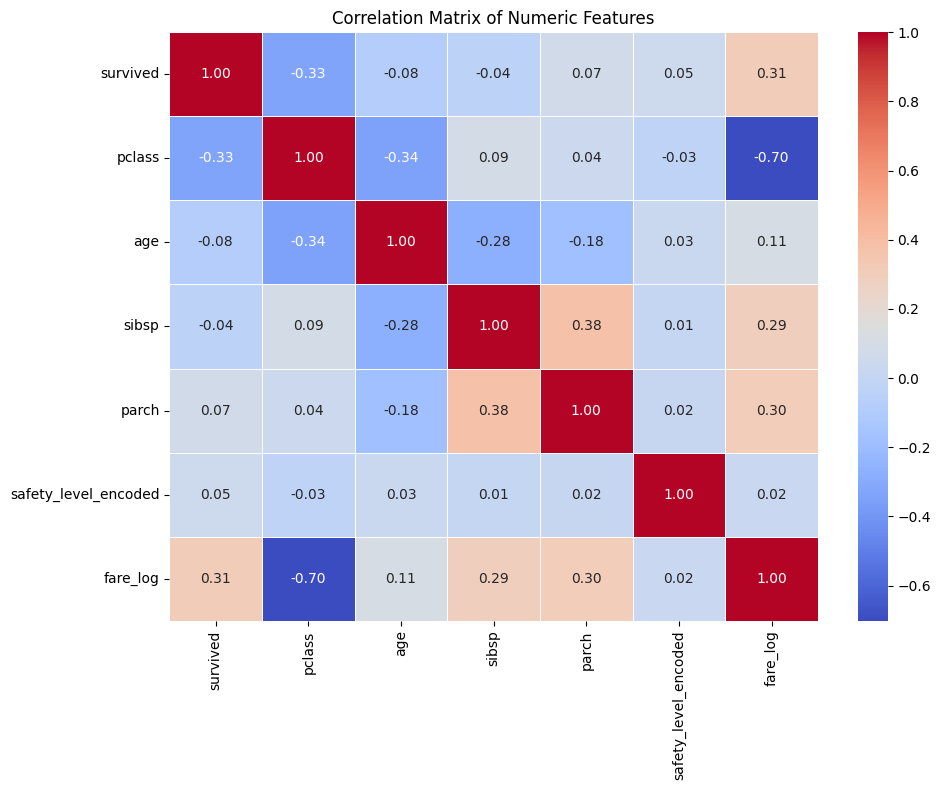

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


In [284]:
print(df['survived'].value_counts())


survived
0.0    455
1.0    320
Name: count, dtype: int64


C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\1271649874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='pastel')
C:\Users\abhinandan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


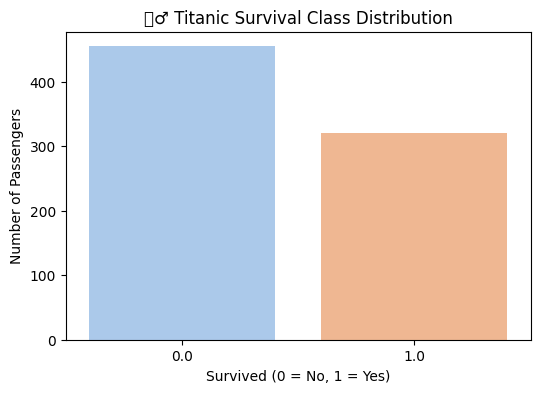

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='pastel')

plt.title("🧍‍♂️ Titanic Survival Class Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()


In [ ]:
features = ['age', 'fare_log', 'pclass', 'survived']

pairplot_df = df[features].dropna()


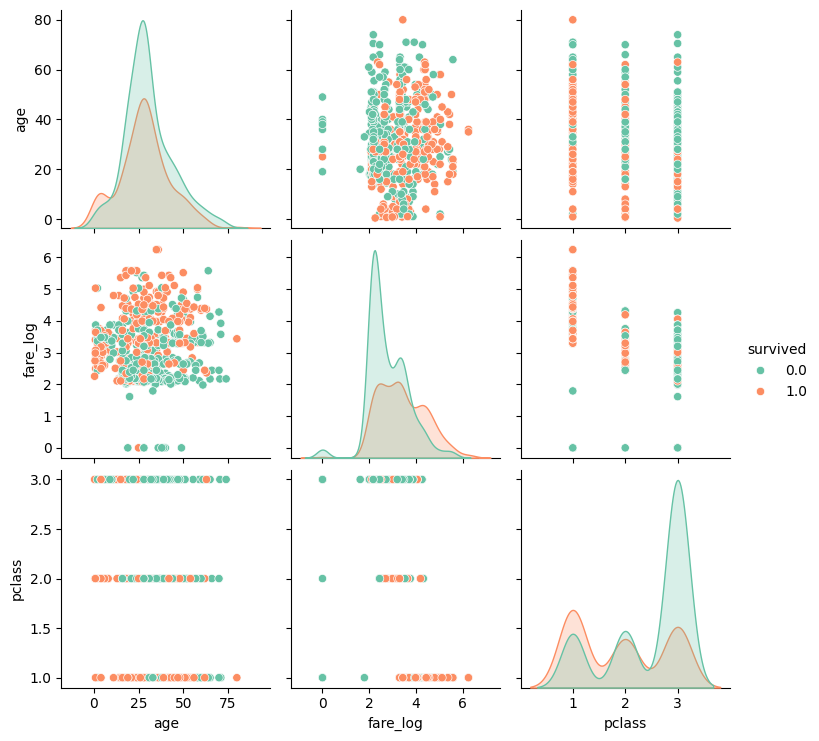

In [291]:
import seaborn as sns
sns.pairplot(data=pairplot_df, hue='survived', palette='Set2', diag_kind='kde')


In [294]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone',
       'booking_year', 'booking_month', 'booking_day', 'safety_level_encoded',
       'fare_log', 'survived_label', 'survived_encoded'],
      dtype='object')

C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\2220141338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=df, palette='pastel')


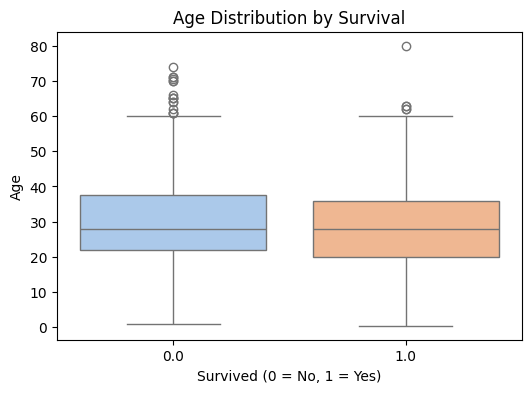

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='age', data=df, palette='pastel')

plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


C:\Users\abhinandan\AppData\Local\Temp\ipykernel_17116\3537148175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='fare_log', data=df, palette='Set2')


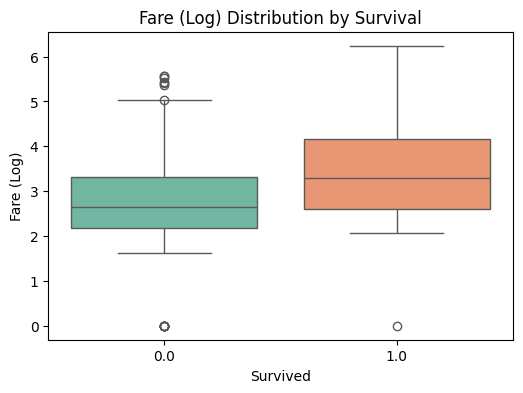

In [296]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='survived', y='fare_log', data=df, palette='Set2')

plt.title("Fare (Log) Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare (Log)")
plt.show()


In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

age_data = df[['age']].dropna()

scaler = StandardScaler()
age_scaled = scaler.fit_transform(age_data)

age_data['age_scaled'] = age_scaled


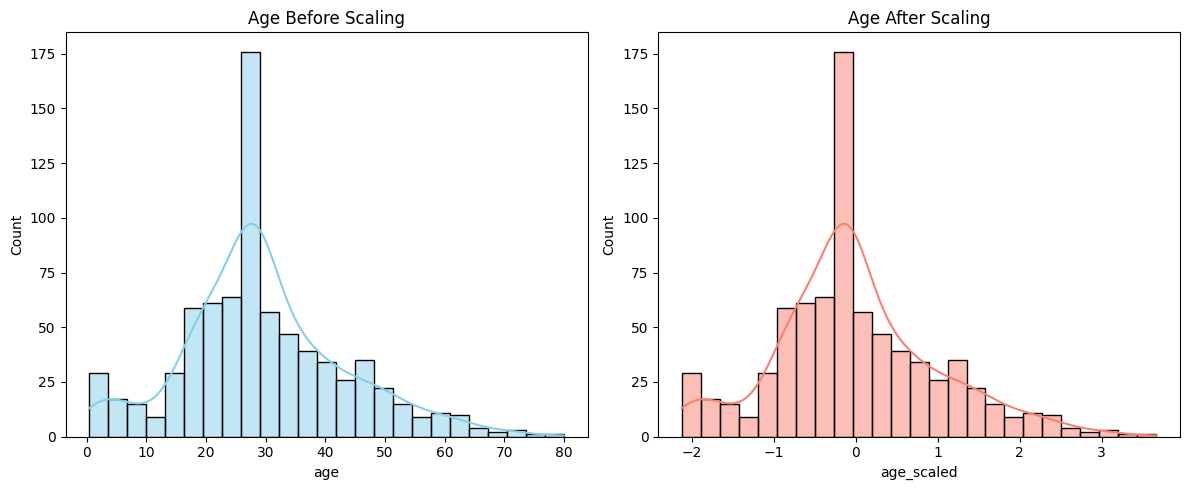

In [300]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(age_data['age'], kde=True, color='skyblue')
plt.title("Age Before Scaling")

plt.subplot(1, 2, 2)
sns.histplot(age_data['age_scaled'], kde=True, color='salmon')
plt.title("Age After Scaling")

plt.tight_layout()
plt.show()


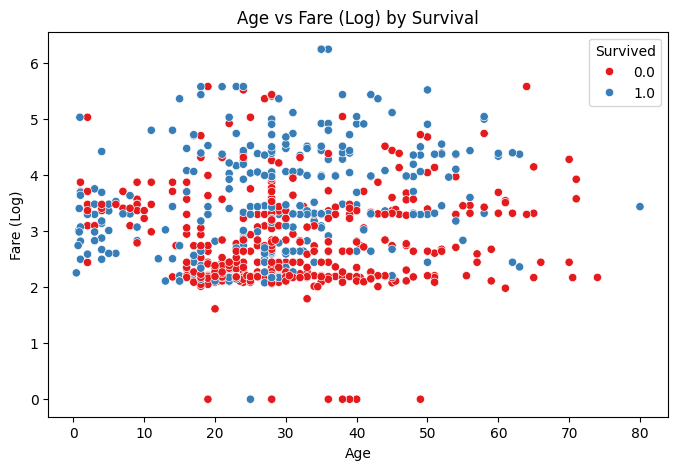

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare_log', data=df, hue='survived', palette='Set1')

plt.title("Age vs Fare (Log) by Survival")
plt.xlabel("Age")
plt.ylabel("Fare (Log)")
plt.legend(title="Survived")
plt.show()


In [318]:
survival_by_sex = df.groupby('sex')['survived'].mean()
survival_by_sex


sex
female    0.739726
male      0.215321
Name: survived, dtype: float64

In [319]:
survival_by_sex = df.groupby('sex')['survived'].count()
survival_by_sex

sex
female    292
male      483
Name: survived, dtype: int64

In [ ]:
avg_fare_by_class = df.groupby('pclass')['fare_log'].mean()
avg_fare_by_class

pclass
1.0    4.129876
2.0    2.992536
3.0    2.501959
Name: fare_log, dtype: float64

In [ ]:
avg_fare_by_class = df.groupby('pclass')['fare_log'].sum()
avg_fare_by_class

pclass
1.0     867.273941
2.0     490.775859
3.0    1003.285421
Name: fare_log, dtype: float64

In [ ]:
survival_pclass_sex = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()
survival_pclass_sex

sex,female,male
pclass,,
1.0,0.967742,0.367521
2.0,0.916667,0.184783
3.0,0.472441,0.160584


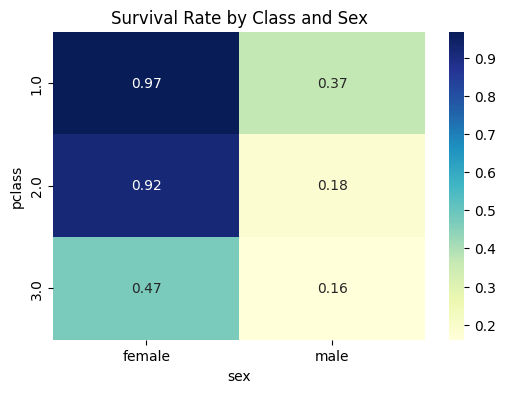

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(survival_pclass_sex, annot=True, cmap='YlGnBu')
plt.title("Survival Rate by Class and Sex")
plt.show()


In [329]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

features = ['age', 'fare_log', 'pclass', 'sex', 'embarked']
X = df[features].copy()
y = df['survived']


In [330]:
num_features = ['age', 'fare_log', 'pclass']
num_imputer = SimpleImputer(strategy="median")
X[num_features] = num_imputer.fit_transform(X[num_features])

cat_features = ['sex', 'embarked']
cat_imputer = SimpleImputer(strategy="most_frequent")
X[cat_features] = cat_imputer.fit_transform(X[cat_features])


In [332]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_cat = encoder.fit_transform(X[cat_features])

X_processed = pd.concat([
    pd.DataFrame(X[num_features], index=X.index),
    pd.DataFrame(X_encoded_cat, index=X.index, columns=encoder.get_feature_names_out(cat_features))
], axis=1)


In [333]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [337]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_pred

array([0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0.])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7741935483870968

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        95
         1.0       0.69      0.75      0.72        60

    accuracy                           0.77       155
   macro avg       0.76      0.77      0.77       155
weighted avg       0.78      0.77      0.78       155



In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


In [340]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}


In [344]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)


Logistic Regression
Accuracy: 0.7677
F1 Score: 0.7143
----------------------------------------
SVM
Accuracy: 0.6968
F1 Score: 0.4471
----------------------------------------
Random Forest
Accuracy: 0.7613
F1 Score: 0.6783
----------------------------------------


In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df_reg = df[['age', 'fare_log']].dropna()

X = df_reg[['age']]  
y = df_reg['fare_log']

In [ ]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

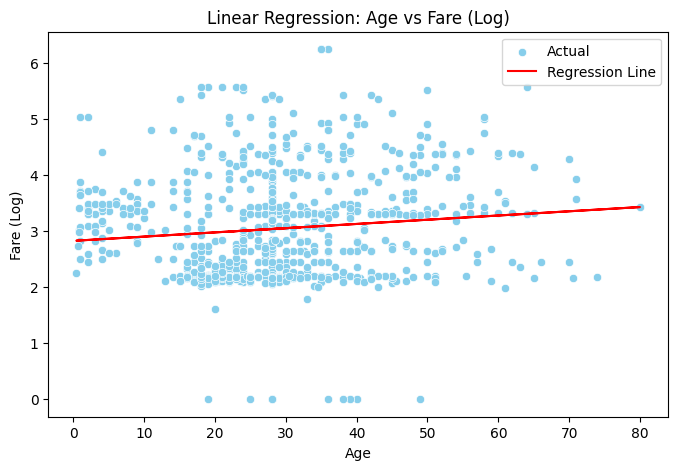

In [349]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['age'], y=y, color='skyblue', label='Actual')
plt.plot(X['age'], y_pred, color='red', label='Regression Line')

plt.title("Linear Regression: Age vs Fare (Log)")
plt.xlabel("Age")
plt.ylabel("Fare (Log)")
plt.legend()
plt.show()


In [350]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.9143
R² Score: 0.0116
